In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
np.random.seed(2)

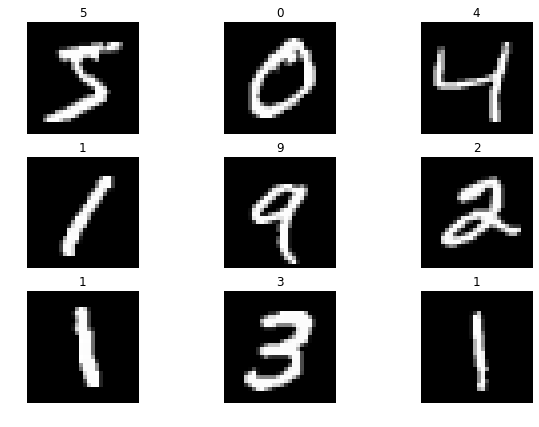

In [2]:
with open('mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist['images'][i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')
plt.show()

In [3]:
model_pca = PCA(n_components=30)
mnist_pca = model_pca.fit(mnist['images'].reshape((-1, 28 ** 2)))

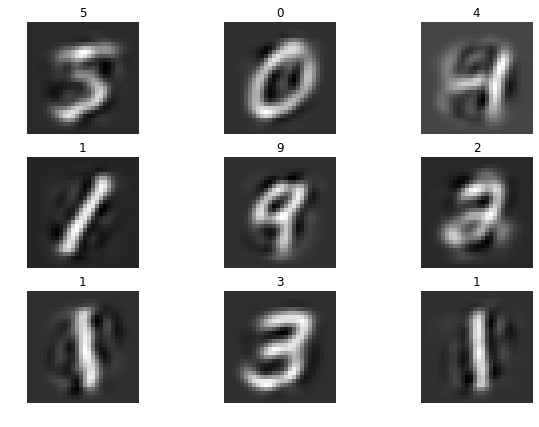

In [4]:
mnist_30comp = model_pca.transform(mnist['images'].reshape((-1, 28 ** 2)))
mnist_30comp_vis = model_pca.inverse_transform(mnist_30comp)
mnist_30comp_vis = mnist_30comp_vis.reshape((-1, 28, 28))

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist_30comp_vis[i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')
plt.show()

In [5]:
model_tsne = TSNE(random_state=0, verbose=1)
model_tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=0, verbose=1)

In [6]:
mnist_tsne = model_tsne.fit_transform(mnist_30comp)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.120s...
[t-SNE] Computed neighbors for 10000 samples in 9.731s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 279.559349
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.199165
[t-SNE] KL divergence after 1000 iterations: 1.699517


In [7]:
mnist_tsne.shape

(10000, 2)

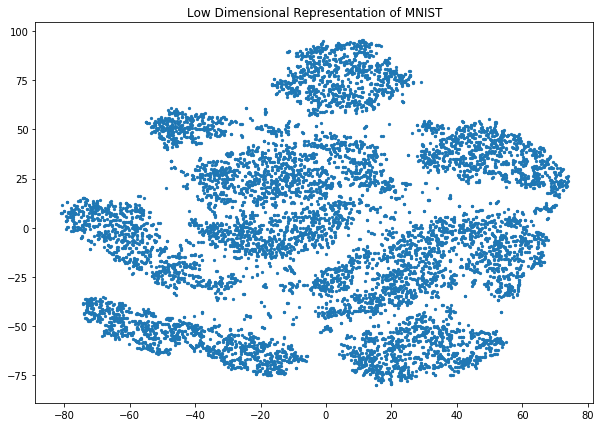

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(mnist_tsne[:,0], mnist_tsne[:,1], s=5)
plt.title('Low Dimensional Representation of MNIST');

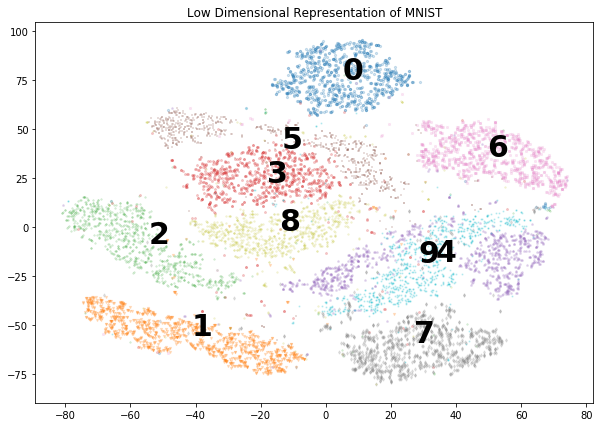

In [9]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of MNIST');
for i in range(10):
    selections = mnist_tsne[mnist['labels'] == i]
    plt.scatter(selections[:,0], selections[:,1], alpha=0.2, marker=MARKER[i], s=5);
    x, y = selections.mean(axis=0)
    plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})
plt.show()

In [10]:
threes = np.where(mnist['labels'] == 3)[0]
threes

array([   7,   10,   12, ..., 9974, 9977, 9991])

In [11]:
tsne_threes = mnist_tsne[threes]
far_threes = np.where(tsne_threes[:,0]< -30)[0]
far_threes

array([   0,   11,   12,   14,   17,   18,   19,   21,   22,   23,   25,
         29,   30,   31,   32,   34,   35,   37,   39,   41,   42,   43,
         51,   54,   55,   56,   58,   60,   63,   66,   67,   68,   74,
         76,   78,   79,   80,   94,   96,   98,   99,  101,  102,  105,
        107,  110,  114,  116,  120,  122,  123,  126,  128,  129,  133,
        137,  142,  143,  144,  145,  151,  152,  153,  157,  158,  169,
        170,  171,  173,  183,  184,  188,  207,  227,  229,  230,  232,
        235,  237,  238,  239,  240,  243,  244,  245,  247,  258,  259,
        260,  261,  263,  292,  294,  295,  303,  307,  308,  313,  314,
        315,  316,  319,  327,  329,  331,  335,  337,  346,  368,  369,
        370,  373,  374,  379,  385,  387,  388,  389,  398,  406,  409,
        410,  421,  422,  424,  427,  431,  432,  433,  437,  438,  439,
        457,  467,  472,  487,  492,  493,  495,  497,  498,  503,  505,
        506,  507,  512,  517,  523,  540,  554,  5

In [12]:
tsne_threes[far_threes]

array([[-33.245396 ,  15.367033 ],
       [-34.24943  ,  25.305525 ],
       [-30.42936  ,  12.924228 ],
       [-34.175644 ,  26.747513 ],
       [-35.4318   ,  25.87446  ],
       [-31.99262  ,  13.599469 ],
       [-38.16992  ,  14.256952 ],
       [-37.881794 ,  14.39551  ],
       [-39.182755 ,  14.743008 ],
       [-31.119278 ,  29.4739   ],
       [-32.50989  ,  27.376127 ],
       [-34.128864 ,  26.868975 ],
       [-32.92759  ,  15.198388 ],
       [-31.954538 ,  24.987238 ],
       [-33.569553 ,  28.537582 ],
       [-33.296795 ,  27.698128 ],
       [-34.13161  ,  28.167988 ],
       [-33.202477 ,  24.170307 ],
       [-33.599377 ,  14.964445 ],
       [-33.22212  ,  24.192333 ],
       [-40.85911  ,  24.693514 ],
       [-32.07143  ,  28.29344  ],
       [-35.406796 ,   9.253002 ],
       [-38.027782 ,  27.004889 ],
       [-38.02166  ,  27.136536 ],
       [-38.47063  ,  27.522543 ],
       [-36.393208 ,  27.348673 ],
       [-36.193443 ,  16.617353 ],
       [-35.676266 ,

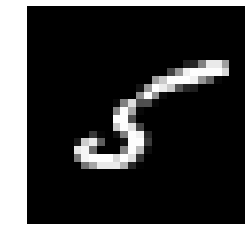

In [13]:
plt.imshow(mnist['images'][11], cmap='gray')
plt.axis('off');

In [14]:
import unittest

class TestPCAtSNE(unittest.TestCase):
    
    """unittest for PCA model"""
    def test_model_pca(self):
        model_pca = PCA(n_components=30)
        self.assertMultiLineEqual(str(model_pca),"""PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)""")
        
    """unittest for TSNE model"""
    def test_model_tsne(self):
        model_tsne = TSNE(random_state=0, verbose=1)
        self.assertMultiLineEqual(str(model_tsne),"""TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=0, verbose=1)""")

In [15]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestPCAtSNE)
unittest.TextTestRunner(verbosity=2).run(suite)

test_model_pca (__main__.TestPCAtSNE) ... ok
test_model_tsne (__main__.TestPCAtSNE) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>